Mean Absolute Error: 265.03404961567776
Mean Squared Error: 77039.2842810213
R-squared Score: -9.44644729434587


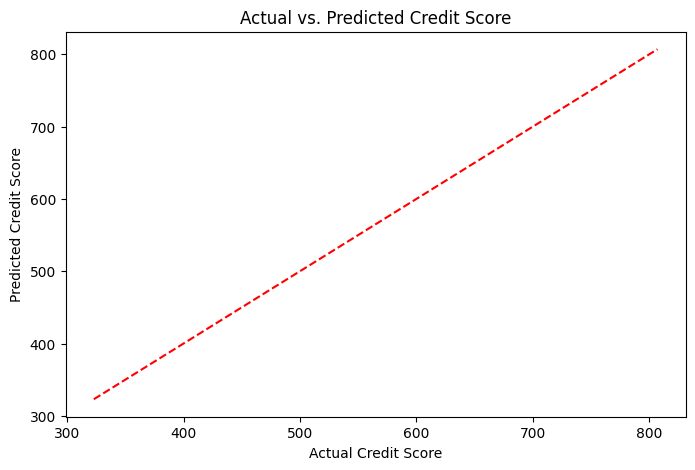

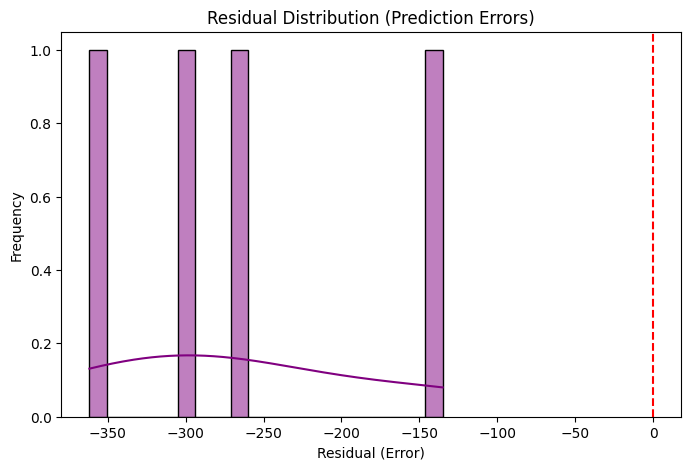

<ipython-input-1-393aff8b58c6>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.index, y=coefficients['Coefficient'], palette='viridis')


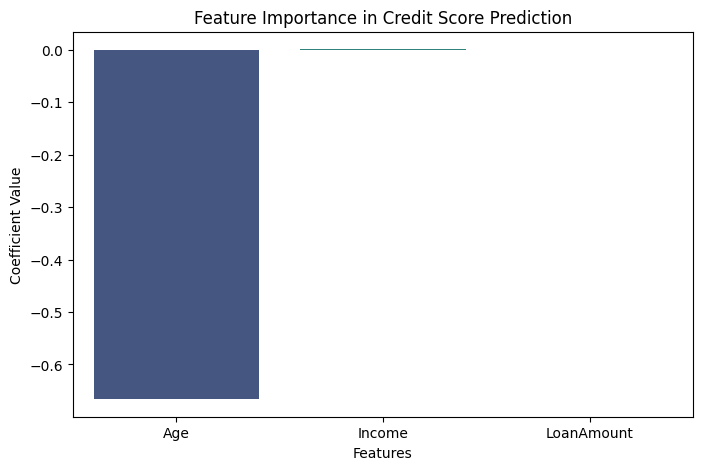

Predicted Credit Score: 675.369655458265


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('/content/credit_data.csv')

# Define features and target variable
X = data[['Age', 'Income', 'LoanAmount']]
y = data['CreditScore']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
# MAE (Mean Absolute Error): Measures average prediction error.
# MSE (Mean Squared Error): Penalizes large errors more.
# R Sq Score: Measures how well the model explains the data.

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))



# Visual 1: Actual vs. Predicted values
# The scatter plot shows how well the model predicts real credit scores.
# The red dashed line represents perfect predictions.
plt.figure(figsize=(8, 5))
# sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Line of perfect predictions
plt.xlabel("Actual Credit Score")
plt.ylabel("Predicted Credit Score")
plt.title("Actual vs. Predicted Credit Score")
plt.show()

# Visual 2: Residual plot
# Residuals are the differences between actual and predicted values.
# A good model should have residuals centered around zero.
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Prediction Errors)")
plt.show()

# Visual 3: Feature importance (coefficients)
# Larger coefficients mean that feature has more impact on credit scores.
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
plt.figure(figsize=(8, 5))
sns.barplot(x=coefficients.index, y=coefficients['Coefficient'], palette='viridis')
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance in Credit Score Prediction")
plt.show()

# Predict Credit Score for new data
# This predicts the credit score for a new person (age 30, income 70,000, loan 20,000).
# The model automatically calculates the credit score based on learned patterns.

new_data = pd.DataFrame({'Age': [30], 'Income': [70000], 'LoanAmount': [20000]})
predicted_score = model.predict(new_data)
print("Predicted Credit Score:", predicted_score[0])
